In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_csv("D:/Swinburne/Sem 4/Technology Application Project/Bitcoin/btcNews_Data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146 entries, 0 to 2145
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      2146 non-null   object 
 1   top_0     2146 non-null   object 
 2   top_1     2119 non-null   object 
 3   top_2     2047 non-null   object 
 4   top_3     1849 non-null   object 
 5   top_4     1629 non-null   object 
 6   top_5     1382 non-null   object 
 7   top_6     1156 non-null   object 
 8   top_7     980 non-null    object 
 9   top_8     842 non-null    object 
 10  top_9     742 non-null    object 
 11  top_10    670 non-null    object 
 12  top_11    587 non-null    object 
 13  top_12    502 non-null    object 
 14  top_13    434 non-null    object 
 15  top_14    367 non-null    object 
 16  top_15    304 non-null    object 
 17  top_16    269 non-null    object 
 18  top_17    229 non-null    object 
 19  top_18    197 non-null    object 
 20  top_19    166 non-null    obje

In [4]:
df.describe

<bound method NDFrame.describe of            date                                              top_0  \
0     7/12/2015  bitcoin the next logical step in the rise of u...   
1     7/13/2015  bitgive foundation announces new initiatives a...   
2     7/14/2015  keynote 2015  harnessing the distributed ledge...   
3     7/15/2015  patrick byrne says   will be able to replace w...   
4     7/16/2015  2015 q1 bitcoin investment trumps 2014 numbers...   
...         ...                                                ...   
2141  5/30/2021  after the installation of microbt whatsminers ...   
2142  5/31/2021  brazil is one of the pioneers of cdbc s study ...   
2143   6/1/2021   our maiden  sto listing on the dbs digital ex...   
2144   6/2/2021   expanding cryptocurrency analysis to find and...   
2145   6/3/2021   advertisers offering  cryptocurrency exchange...   

                                                  top_1  \
0     the blockchain  towards crypto sovereignty    ...   
1     b

In [5]:
df.head()

,date,top_0,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8,...,top_32,top_33,top_34,top_35,price,open,high,low,vol.,change %
0,7/12/2015,bitcoin the next logical step in the rise of u...,the blockchain towards crypto sovereignty ...,coinbase outage is a reminder to not store bit...,2015 q1 bitcoin vc investment trumps the numbe...,future use cases for blockhain technology dis...,poloniex leaves new york due to bitlicense ...,what is bitcoin xt amp what is happening wit...,mainstream medias failure with bitcoin reporti...,bitcoin a technological innovation restoring ...,...,the avalanche web wallet experienced an outag...,ant group and tencent have all been key pla...,opponents of the tax on crypto profits outnum...,f2pool was the top bitcoin mining operation w...,310.4,292.0,315.9,291.3,120.70K,6.33%
1,7/13/2015,bitgive foundation announces new initiatives a...,bitcoin in review interesting trends in q1 of...,cloudminr user accounts hacked data sold for ...,the block size debate and sock puppet accusa...,future use cases for blockchain technology p...,the low hanging fruit of bitcoin adoption vi...,scotland has plans to develop its own digital ...,bitcoin charitable donations the tables are s...,peek inside coinpoint a full service bitcoin ...,...,while consumer interest in cryptocurrency ...,there are particular cryptos that are in my ...,of the 75 enforcement actions 43 were litiga...,NaN,290.4,310.4,310.9,276.9,146.85K,-6.47%
2,7/14/2015,keynote 2015 harnessing the distributed ledge...,cash back vs bitcoin why bitcoin can be super...,force or mathematics fiat vs cryptocurrency ...,the 9 most visited websites in the bitcoin eco...,future use cases of blockchain technology dec...,the kids keep asking bitcoin are we there ye...,barclays bank they come for the blockchain b...,back to the future bitcoin as a vehicle for i...,changing the blockchain pr image for average c...,...,the tremendous interest we are seeing in thes...,palantir technologies peter thiel has been a ...,another reason why the bitcoin hashrate is dr...,NaN,287.0,290.4,297.0,285.2,60.62K,-1.17%
3,7/15/2015,patrick byrne says will be able to replace w...,bitcoin based transparent marketplaces can pre...,vladimir putin speaks out in favor of bitcoin ...,apple pay same old ball amp chain bitcoin,what happens to bitcoin miners when all coins ...,banks could be working on blockchain based dig...,you can now find the bitcoin based debit card ...,accepted here 10 000 coinify merchants take...,e coin bitcoin cards an interview with georgy...,...,here and now the perspective is shifted bac...,binance is being probed by the u s department...,NaN,NaN,283.4,287.0,292.9,283.2,59.58K,-1.23%
4,7/16/2015,2015 q1 bitcoin investment trumps 2014 numbers...,california wants to suspend uber in attempt to...,kraken announces new fee structure bitcoin,fintech the rehashing of old payment methods...,purse io offers plenty of bitcoin arbitrage op...,it looks like may be our newest user over at...,we are proud to do our part to help scale bitc...,today we are going to have mr patrick byrne c...,the governor of delaware has announced the ...,...,the company is already accepting bitcoin so ...,the learning course is also being used to prep...,NaN,NaN,276.6,283.4,290.8,273.3,121.32K,-2.41%


## Part 1: Predict Using the Numerical Data

### Pre-processing

In [6]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146 entries, 0 to 2145
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      2146 non-null   datetime64[ns]
 1   top_0     2146 non-null   object        
 2   top_1     2119 non-null   object        
 3   top_2     2047 non-null   object        
 4   top_3     1849 non-null   object        
 5   top_4     1629 non-null   object        
 6   top_5     1382 non-null   object        
 7   top_6     1156 non-null   object        
 8   top_7     980 non-null    object        
 9   top_8     842 non-null    object        
 10  top_9     742 non-null    object        
 11  top_10    670 non-null    object        
 12  top_11    587 non-null    object        
 13  top_12    502 non-null    object        
 14  top_13    434 non-null    object        
 15  top_14    367 non-null    object        
 16  top_15    304 non-null    object        
 17  top_16    269 

In [8]:
# Function to convert volume string to numeric value
def convert_volume(vol_str):
    if 'K' in vol_str:
        return float(vol_str.replace('K', '')) * 1000
    elif 'M' in vol_str:
        return float(vol_str.replace('M', '')) * 1_000_000
    elif 'B' in vol_str:
        return float(vol_str.replace('B', '')) * 1_000_000_000
    else:
        return float(vol_str)  # For plain numbers

# Apply the function to the 'vol.' column
df['vol.'] = df['vol.'].apply(convert_volume)

In [9]:
# Clean the 'change %' column as before
df['change %'] = df['change %'].replace('%', '', regex=True).astype(float) / 100

In [10]:
# Display the cleaned DataFrame
df.head()

,date,top_0,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8,...,top_32,top_33,top_34,top_35,price,open,high,low,vol.,change %
0,2015-07-12,bitcoin the next logical step in the rise of u...,the blockchain towards crypto sovereignty ...,coinbase outage is a reminder to not store bit...,2015 q1 bitcoin vc investment trumps the numbe...,future use cases for blockhain technology dis...,poloniex leaves new york due to bitlicense ...,what is bitcoin xt amp what is happening wit...,mainstream medias failure with bitcoin reporti...,bitcoin a technological innovation restoring ...,...,the avalanche web wallet experienced an outag...,ant group and tencent have all been key pla...,opponents of the tax on crypto profits outnum...,f2pool was the top bitcoin mining operation w...,310.4,292.0,315.9,291.3,120700.0,0.0633
1,2015-07-13,bitgive foundation announces new initiatives a...,bitcoin in review interesting trends in q1 of...,cloudminr user accounts hacked data sold for ...,the block size debate and sock puppet accusa...,future use cases for blockchain technology p...,the low hanging fruit of bitcoin adoption vi...,scotland has plans to develop its own digital ...,bitcoin charitable donations the tables are s...,peek inside coinpoint a full service bitcoin ...,...,while consumer interest in cryptocurrency ...,there are particular cryptos that are in my ...,of the 75 enforcement actions 43 were litiga...,NaN,290.4,310.4,310.9,276.9,146850.0,-0.0647
2,2015-07-14,keynote 2015 harnessing the distributed ledge...,cash back vs bitcoin why bitcoin can be super...,force or mathematics fiat vs cryptocurrency ...,the 9 most visited websites in the bitcoin eco...,future use cases of blockchain technology dec...,the kids keep asking bitcoin are we there ye...,barclays bank they come for the blockchain b...,back to the future bitcoin as a vehicle for i...,changing the blockchain pr image for average c...,...,the tremendous interest we are seeing in thes...,palantir technologies peter thiel has been a ...,another reason why the bitcoin hashrate is dr...,NaN,287.0,290.4,297.0,285.2,60620.0,-0.0117
3,2015-07-15,patrick byrne says will be able to replace w...,bitcoin based transparent marketplaces can pre...,vladimir putin speaks out in favor of bitcoin ...,apple pay same old ball amp chain bitcoin,what happens to bitcoin miners when all coins ...,banks could be working on blockchain based dig...,you can now find the bitcoin based debit card ...,accepted here 10 000 coinify merchants take...,e coin bitcoin cards an interview with georgy...,...,here and now the perspective is shifted bac...,binance is being probed by the u s department...,NaN,NaN,283.4,287.0,292.9,283.2,59580.0,-0.0123
4,2015-07-16,2015 q1 bitcoin investment trumps 2014 numbers...,california wants to suspend uber in attempt to...,kraken announces new fee structure bitcoin,fintech the rehashing of old payment methods...,purse io offers plenty of bitcoin arbitrage op...,it looks like may be our newest user over at...,we are proud to do our part to help scale bitc...,today we are going to have mr patrick byrne c...,the governor of delaware has announced the ...,...,the company is already accepting bitcoin so ...,the learning course is also being used to prep...,NaN,NaN,276.6,283.4,290.8,273.3,121320.0,-0.0241


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146 entries, 0 to 2145
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      2146 non-null   datetime64[ns]
 1   top_0     2146 non-null   object        
 2   top_1     2119 non-null   object        
 3   top_2     2047 non-null   object        
 4   top_3     1849 non-null   object        
 5   top_4     1629 non-null   object        
 6   top_5     1382 non-null   object        
 7   top_6     1156 non-null   object        
 8   top_7     980 non-null    object        
 9   top_8     842 non-null    object        
 10  top_9     742 non-null    object        
 11  top_10    670 non-null    object        
 12  top_11    587 non-null    object        
 13  top_12    502 non-null    object        
 14  top_13    434 non-null    object        
 15  top_14    367 non-null    object        
 16  top_15    304 non-null    object        
 17  top_16    269 

### 1. Exploratory Data Analysis (EDA) on Numerical Data

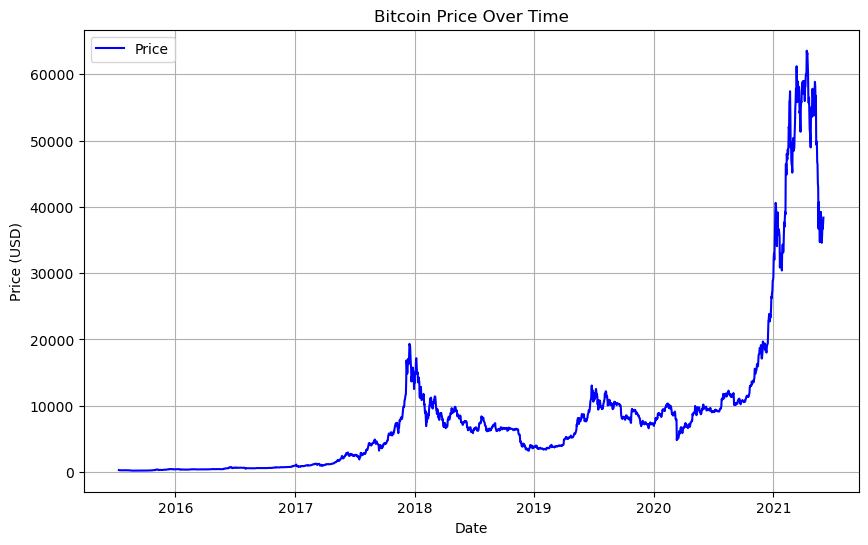

In [12]:
# 1. a. Visualize the historical price movements using line charts to identify trends
plt.figure(figsize=(10,6))
plt.plot(df['date'], df['price'], label='Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Bitcoin Price Over Time')
plt.legend()
plt.grid(True)
plt.show()

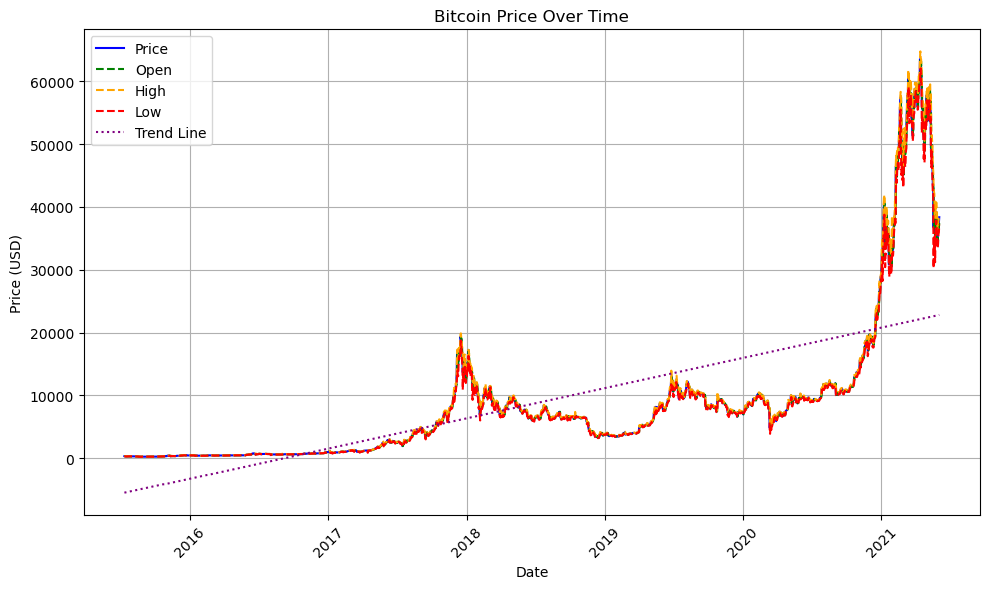

In [13]:
# 1. a. Visualize the historical price movements using line charts to identify trends
plt.figure(figsize=(10, 6))

# Plot the actual price data
plt.plot(df['date'], df['price'], label='Price', color='blue')

# Plot open, high, and low prices
plt.plot(df['date'], df['open'], label='Open', color='green', linestyle='--')
plt.plot(df['date'], df['high'], label='High', color='orange', linestyle='--')
plt.plot(df['date'], df['low'], label='Low', color='red', linestyle='--')

# Calculate the trend line for the price
z = np.polyfit(df.index, df['price'], 1)  # Fit a line (degree 1)
p = np.poly1d(z)  # Create a polynomial function
plt.plot(df['date'], p(df.index), label='Trend Line', color='purple', linestyle=':')

plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Bitcoin Price Over Time')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

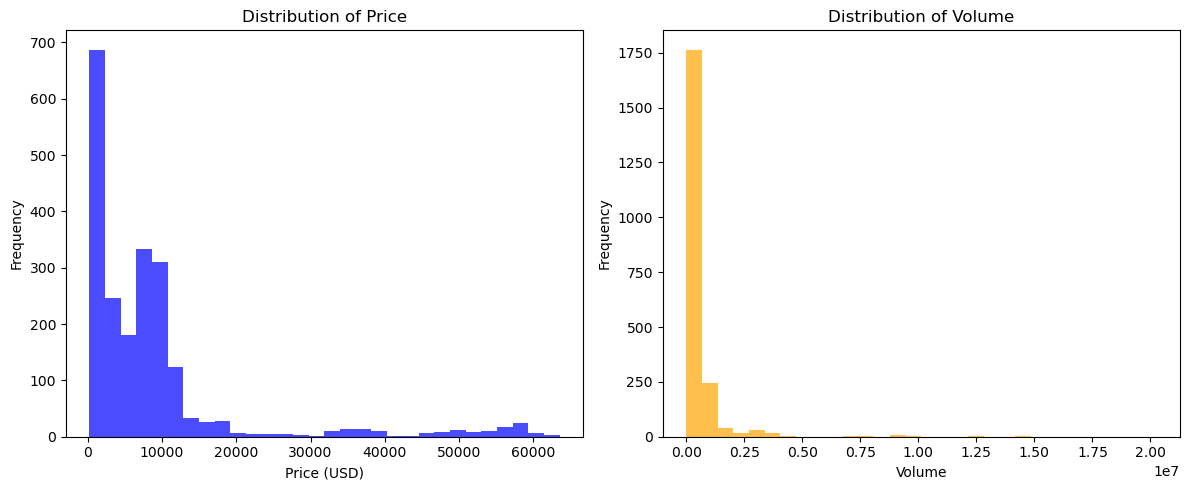

In [14]:
plt.figure(figsize=(12, 5))

# Histogram for price
plt.subplot(1, 2, 1)
plt.hist(df['price'], bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Price')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')

# Histogram for volume
plt.subplot(1, 2, 2)
plt.hist(df['vol.'], bins=30, color='orange', alpha=0.7)
plt.title('Distribution of Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

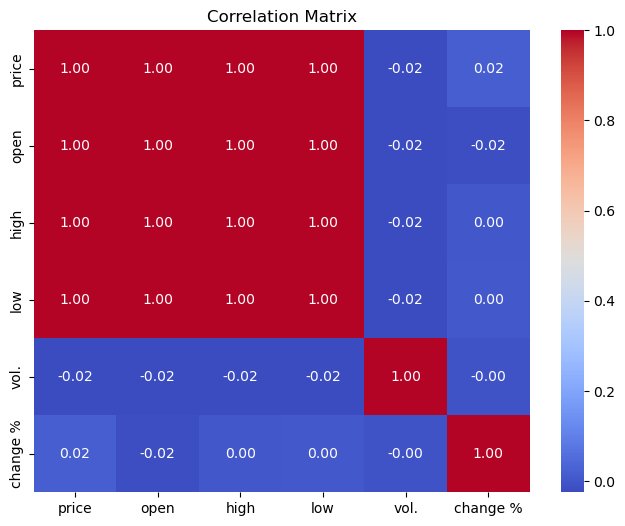

In [15]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df[['price', 'open', 'high', 'low', 'vol.', 'change %']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

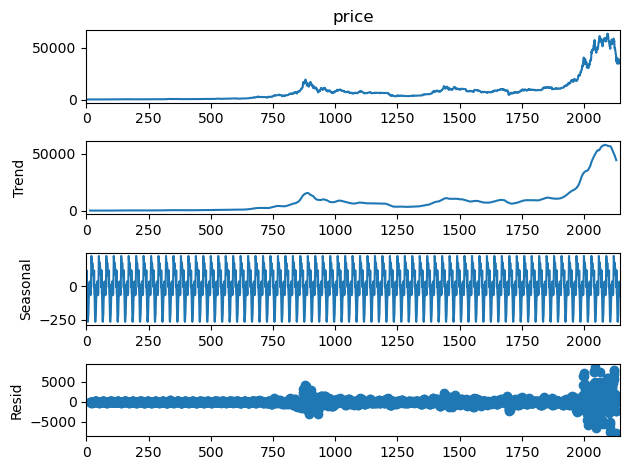

In [16]:
# Time series decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

# Decomposing the price series
decomposition = seasonal_decompose(df['price'], model='additive', period=30)  # Adjust period as needed
fig = decomposition.plot()
plt.show()

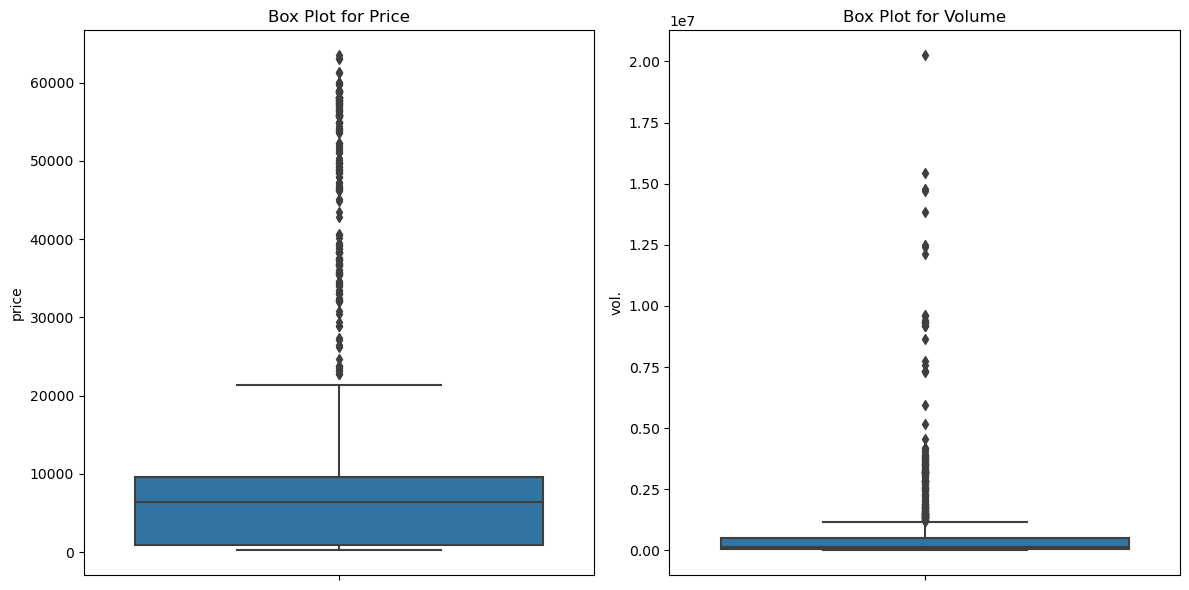

In [17]:
plt.figure(figsize=(12, 6))

# Box plot for price
plt.subplot(1, 2, 1)
sns.boxplot(y=df['price'])
plt.title('Box Plot for Price')

# Box plot for volume
plt.subplot(1, 2, 2)
sns.boxplot(y=df['vol.'])
plt.title('Box Plot for Volume')

plt.tight_layout()
plt.show()

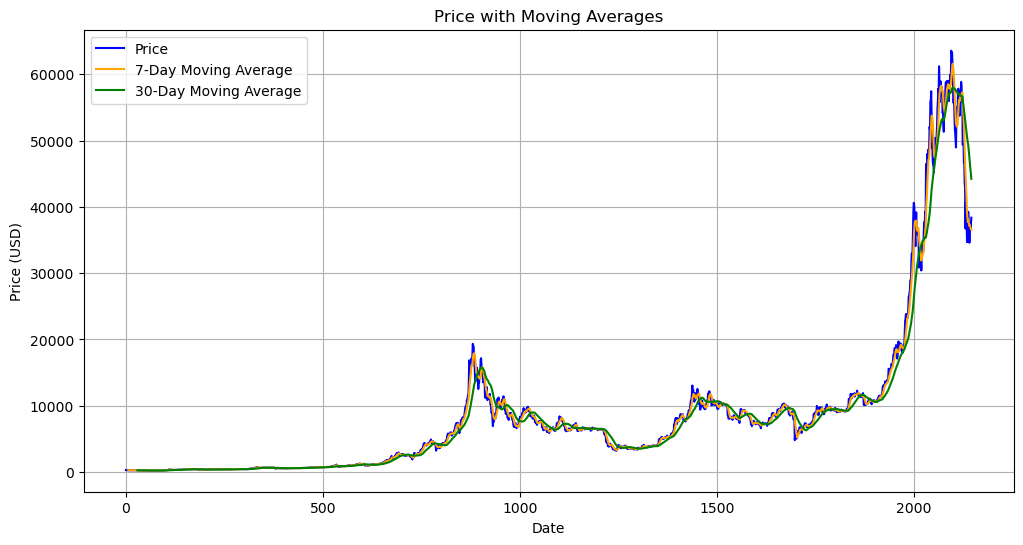

In [18]:
# Calculate moving averages
df['MA_7'] = df['price'].rolling(window=7).mean()
df['MA_30'] = df['price'].rolling(window=30).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['price'], label='Price', color='blue')
plt.plot(df['MA_7'], label='7-Day Moving Average', color='orange')
plt.plot(df['MA_30'], label='30-Day Moving Average', color='green')
plt.title('Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

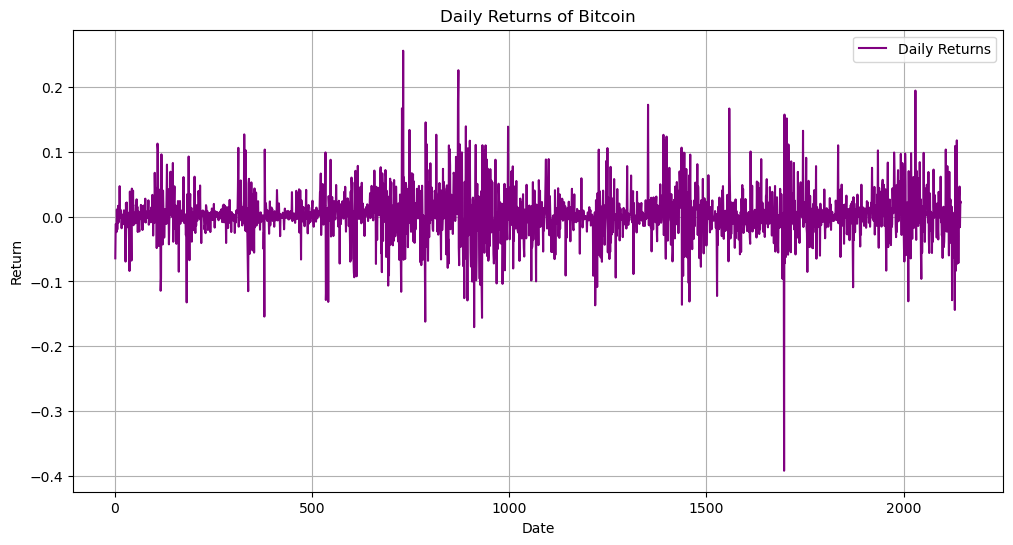

In [19]:
# Calculate daily returns
df['daily_return'] = df['price'].pct_change()

plt.figure(figsize=(12, 6))
plt.plot(df['daily_return'], label='Daily Returns', color='purple')
plt.title('Daily Returns of Bitcoin')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()

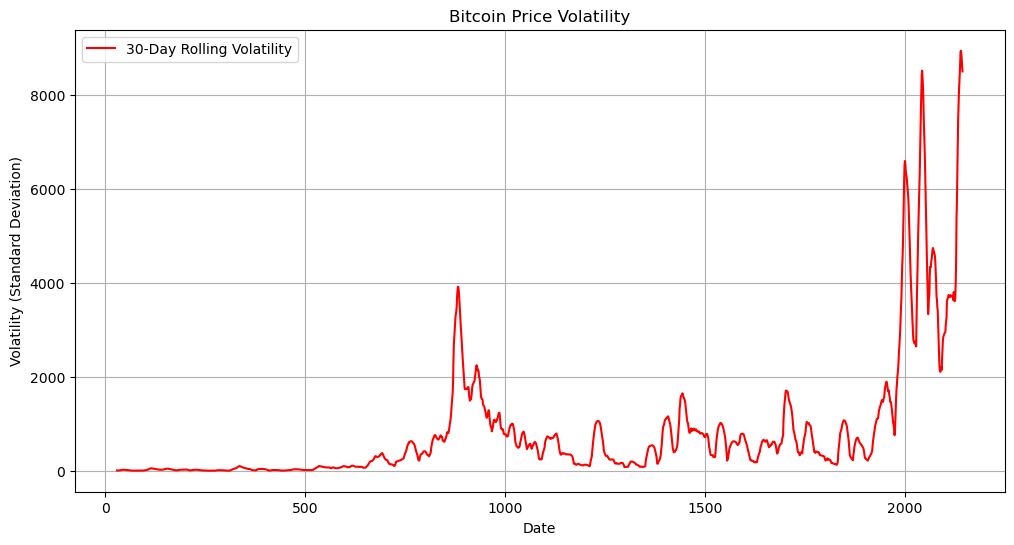

In [20]:
# Calculate rolling standard deviation
df['rolling_volatility'] = df['price'].rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(df['rolling_volatility'], label='30-Day Rolling Volatility', color='red')
plt.title('Bitcoin Price Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility (Standard Deviation)')
plt.legend()
plt.grid(True)
plt.show()

## Parametrics and non - parametrics measures

In [21]:
# 1. b. Compute parametric measures
# Parametric measures include mean and standard deviation
mean_price = df['price'].mean()
std_price = df['price'].std()

mean_open = df['open'].mean()
std_open = df['open'].std()

mean_high = df['high'].mean()
std_high = df['high'].std()

mean_low = df['low'].mean()
std_low = df['low'].std()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146 entries, 0 to 2145
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                2146 non-null   datetime64[ns]
 1   top_0               2146 non-null   object        
 2   top_1               2119 non-null   object        
 3   top_2               2047 non-null   object        
 4   top_3               1849 non-null   object        
 5   top_4               1629 non-null   object        
 6   top_5               1382 non-null   object        
 7   top_6               1156 non-null   object        
 8   top_7               980 non-null    object        
 9   top_8               842 non-null    object        
 10  top_9               742 non-null    object        
 11  top_10              670 non-null    object        
 12  top_11              587 non-null    object        
 13  top_12              502 non-null    object      

In [23]:
# Non-parametric measures: mode, IQR
import pandas as pd
from scipy import stats

# Assuming df is already defined as a DataFrame

# Mode for each column
mode_values = df[['price', 'open', 'high', 'low', 'vol.', 'change %']].mode().iloc[0]

# IQR (Interquartile Range) for each column
Q1 = df[['price', 'open', 'high', 'low', 'vol.', 'change %']].quantile(0.25)
Q3 = df[['price', 'open', 'high', 'low', 'vol.', 'change %']].quantile(0.75)
IQR = Q3 - Q1

print("Non-Parametric Measures:")
print("Mode for each column:")
print(mode_values)

print("\nIQR for each column:")
print(IQR)

Non-Parametric Measures:
Mode for each column:
price           229.500
open            229.500
high            228.400
low             592.800
vol.        1050000.000
change %         -0.005
Name: 0, dtype: float64

IQR for each column:
price         8682.575000
open          8673.925000
high          8836.000000
low           8453.250000
vol.        447530.000000
change %         0.029975
dtype: float64


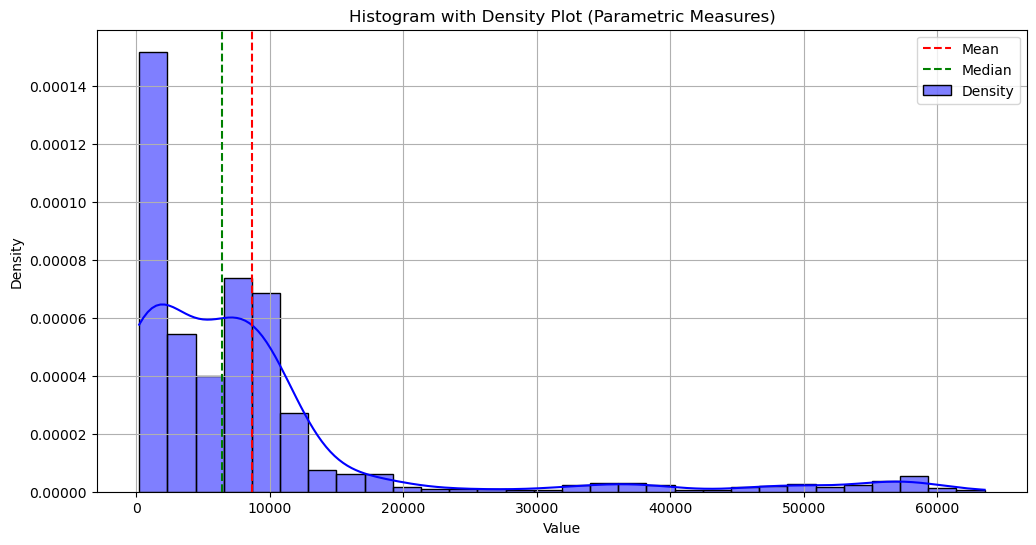

In [24]:
# Histogram with density plot
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], bins=30, kde=True, color='blue', stat='density', label='Density')
plt.axvline(df['price'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['price'].median(), color='green', linestyle='--', label='Median')
plt.title('Histogram with Density Plot (Parametric Measures)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
# 1. c. Compute non-parametric measures
# Non-parametric measures include median and interquartile range (IQR)
median_price = df['price'].median()
iqr_price = df['price'].quantile(0.75) - df['price'].quantile(0.25)

median_open = df['open'].median()
iqr_open = df['open'].quantile(0.75) - df['open'].quantile(0.25)

median_high = df['high'].median()
iqr_high = df['high'].quantile(0.75) - df['high'].quantile(0.25)

median_low = df['low'].median()
iqr_low = df['low'].quantile(0.75) - df['low'].quantile(0.25)

In [26]:
# 1. d. Compare parametric and non-parametric measures
print("Parametric Measures:")
print(f"Mean Price: {mean_price:.2f}, Standard Deviation Price: {std_price:.2f}")
print(f"Mean Open: {mean_open:.2f}, Standard Deviation Open: {std_open:.2f}")
print(f"Mean High: {mean_high:.2f}, Standard Deviation High: {std_high:.2f}")
print(f"Mean Low: {mean_low:.2f}, Standard Deviation Low: {std_low:.2f}")

print("\nNon-Parametric Measures:")
print(f"Median Price: {median_price:.2f}, IQR Price: {iqr_price:.2f}")
print(f"Median Open: {median_open:.2f}, IQR Open: {iqr_open:.2f}")
print(f"Median High: {median_high:.2f}, IQR High: {iqr_high:.2f}")
print(f"Median Low: {median_low:.2f}, IQR Low: {iqr_low:.2f}")

Parametric Measures:
Mean Price: 8649.91, Standard Deviation Price: 12071.30
Mean Open: 8632.00, Standard Deviation Open: 12055.22
Mean High: 8896.11, Standard Deviation High: 12454.35
Mean Low: 8336.82, Standard Deviation Low: 11588.47

Non-Parametric Measures:
Median Price: 6394.95, IQR Price: 8682.58
Median Open: 6391.00, IQR Open: 8673.92
Median High: 6528.80, IQR High: 8836.00
Median Low: 6278.90, IQR Low: 8453.25


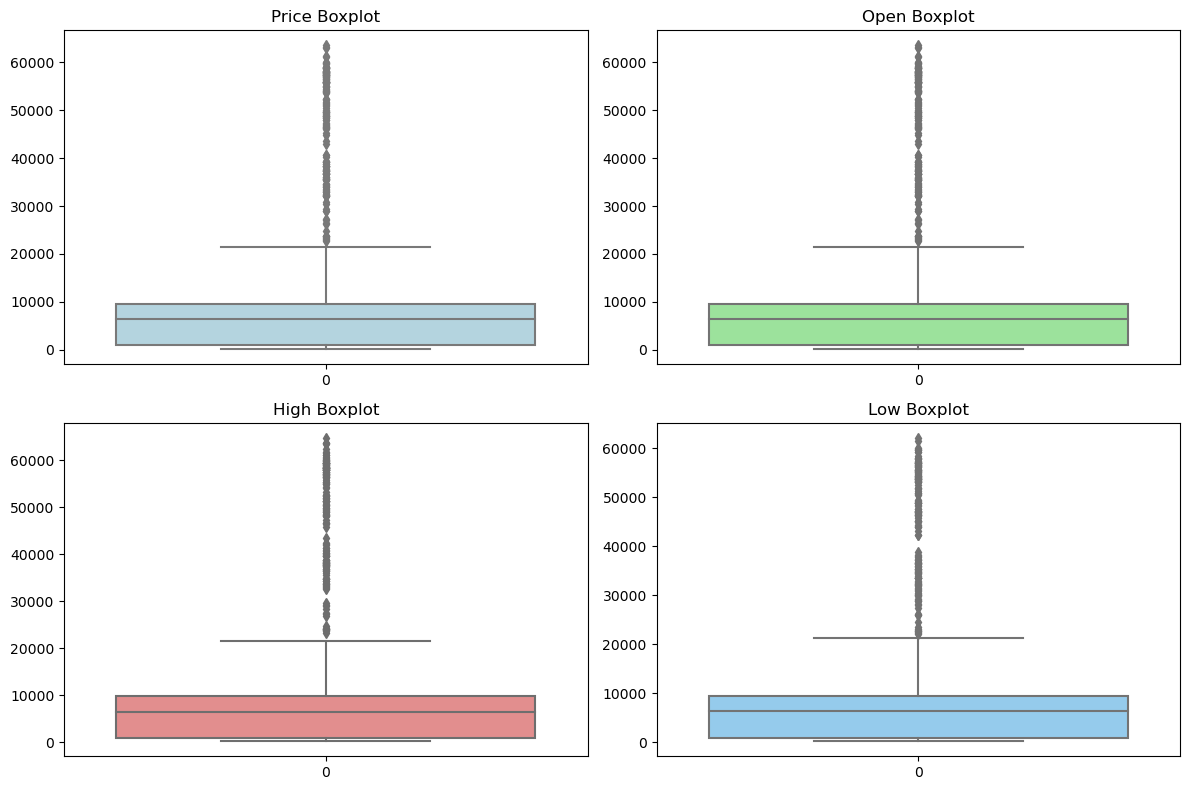

In [27]:
# Visual comparison of parametric and non-parametric measures
fig, axs = plt.subplots(2, 2, figsize=(12,8))
sns.boxplot(df['price'], ax=axs[0, 0], color='lightblue').set_title('Price Boxplot')
sns.boxplot(df['open'], ax=axs[0, 1], color='lightgreen').set_title('Open Boxplot')
sns.boxplot(df['high'], ax=axs[1, 0], color='lightcoral').set_title('High Boxplot')
sns.boxplot(df['low'], ax=axs[1, 1], color='lightskyblue').set_title('Low Boxplot')
plt.tight_layout()
plt.show()

### Handle missing values

In [28]:
import pandas as pd

# Load your dataset
# df = pd.read_csv('your_time_series_data.csv')  # Replace with your dataset path

# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Create a DataFrame to summarize the missing values
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

print(missing_summary[missing_summary['Missing Values'] > 0])  # Display columns with missing values


                    Missing Values  Percentage
top_1                           27    1.258155
top_2                           99    4.613234
top_3                          297   13.839702
top_4                          517   24.091333
top_5                          764   35.601118
top_6                          990   46.132339
top_7                         1166   54.333644
top_8                         1304   60.764212
top_9                         1404   65.424045
top_10                        1476   68.779124
top_11                        1559   72.646785
top_12                        1644   76.607642
top_13                        1712   79.776328
top_14                        1779   82.898416
top_15                        1842   85.834110
top_16                        1877   87.465051
top_17                        1917   89.328984
top_18                        1949   90.820130
top_19                        1980   92.264678
top_20                        2003   93.336440
top_21       

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146 entries, 0 to 2145
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                2146 non-null   datetime64[ns]
 1   top_0               2146 non-null   object        
 2   top_1               2119 non-null   object        
 3   top_2               2047 non-null   object        
 4   top_3               1849 non-null   object        
 5   top_4               1629 non-null   object        
 6   top_5               1382 non-null   object        
 7   top_6               1156 non-null   object        
 8   top_7               980 non-null    object        
 9   top_8               842 non-null    object        
 10  top_9               742 non-null    object        
 11  top_10              670 non-null    object        
 12  top_11              587 non-null    object        
 13  top_12              502 non-null    object      

## 3. Identifying Outliers in Time Series
Objective: To detect anomalies that may affect the quality of predictions.
Hint:
a. Visualize outliers using box plots and time series plots.
b. Explore the way to find outliers in time series

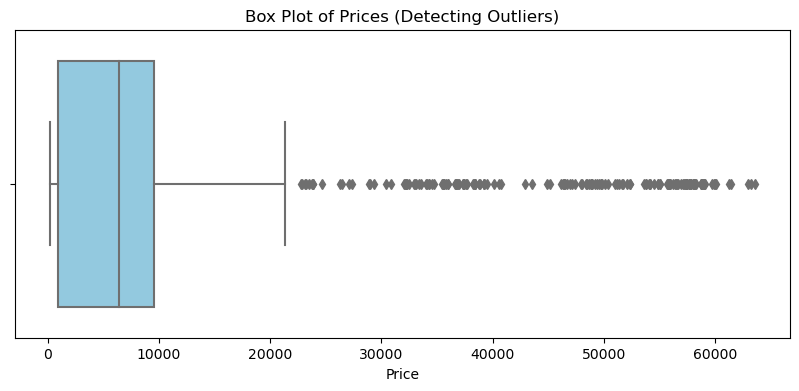

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# a. Box Plot for detecting outliers
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['price'], color='skyblue')
plt.title('Box Plot of Prices (Detecting Outliers)')
plt.xlabel('Price')
plt.show()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146 entries, 0 to 2145
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                2146 non-null   datetime64[ns]
 1   top_0               2146 non-null   object        
 2   top_1               2119 non-null   object        
 3   top_2               2047 non-null   object        
 4   top_3               1849 non-null   object        
 5   top_4               1629 non-null   object        
 6   top_5               1382 non-null   object        
 7   top_6               1156 non-null   object        
 8   top_7               980 non-null    object        
 9   top_8               842 non-null    object        
 10  top_9               742 non-null    object        
 11  top_10              670 non-null    object        
 12  top_11              587 non-null    object        
 13  top_12              502 non-null    object      

#### Z-score

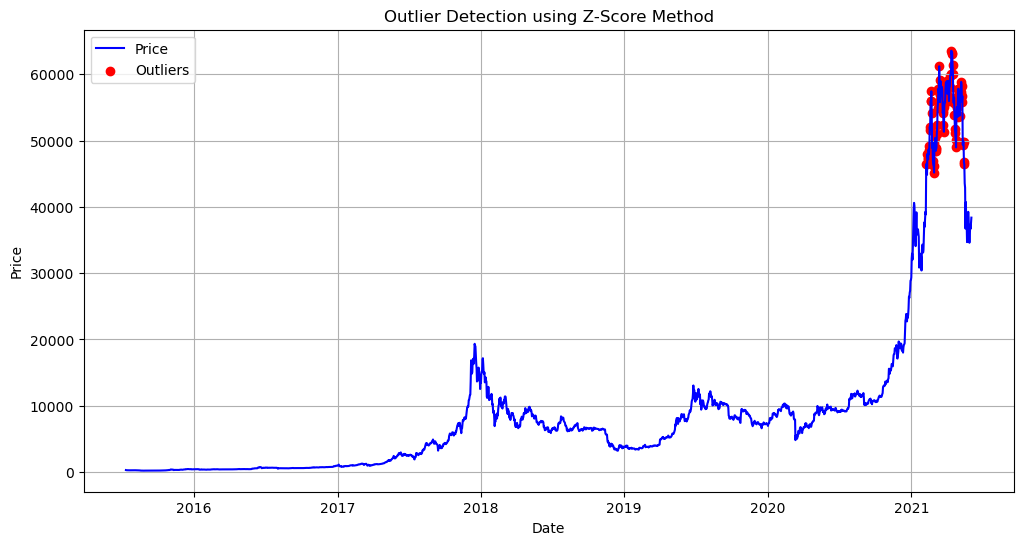

In [32]:
# Z-Score calculation for outlier detection
df['z_score'] = (df['price'] - df['price'].mean()) / df['price'].std()

# Identify outliers where the Z-score exceeds the threshold (e.g., 3)
outliers = df[np.abs(df['z_score']) > 3]

# Plot with outliers highlighted
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['price'], label='Price', color='blue')
plt.scatter(outliers['date'], outliers['price'], color='red', label='Outliers', marker='o')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Outlier Detection using Z-Score Method')
plt.legend()
plt.grid(True)
plt.show()

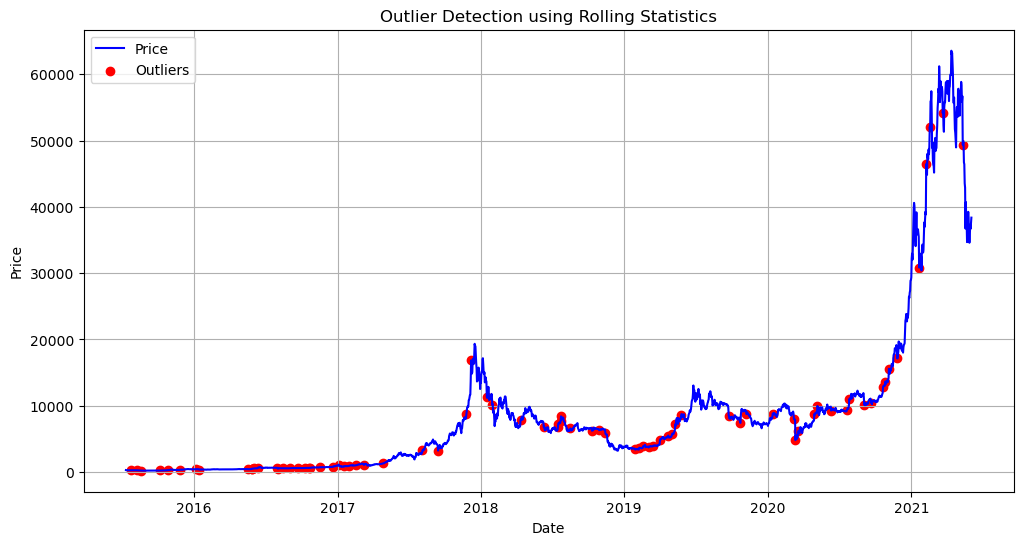

In [33]:
# Calculate rolling mean and standard deviation
window_size = 7  # e.g., 7 days
df['rolling_mean'] = df['price'].rolling(window=window_size).mean()
df['rolling_std'] = df['price'].rolling(window=window_size).std()

# Identify outliers where the price exceeds 2 standard deviations from the rolling mean
df['outlier'] = (df['price'] > df['rolling_mean'] + 2 * df['rolling_std']) | (df['price'] < df['rolling_mean'] - 2 * df['rolling_std'])

# Plot time series with outliers highlighted
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['price'], label='Price', color='blue')
plt.scatter(df[df['outlier']]['date'], df[df['outlier']]['price'], color='red', label='Outliers', marker='o')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Outlier Detection using Rolling Statistics')
plt.legend()
plt.grid(True)
plt.show()

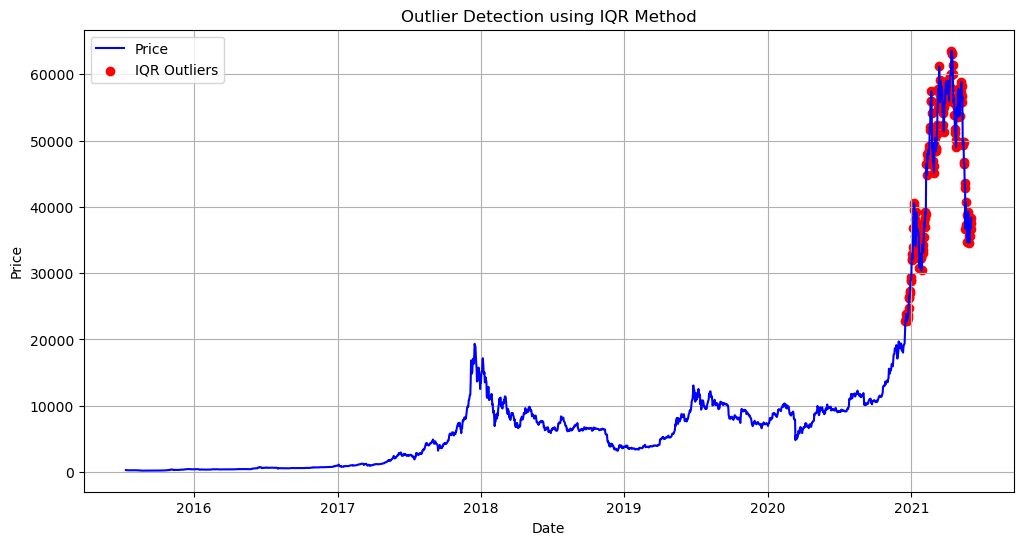

In [34]:
# Calculate IQR for price
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers based on IQR
outliers_iqr = df[(df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR))]

# Plot time series with IQR-based outliers highlighted
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['price'], label='Price', color='blue')
plt.scatter(outliers_iqr['date'], outliers_iqr['price'], color='red', label='IQR Outliers', marker='o')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Outlier Detection using IQR Method')
plt.legend()
plt.grid(True)
plt.show()

### ACF and PCF

c:\Users\DELL\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


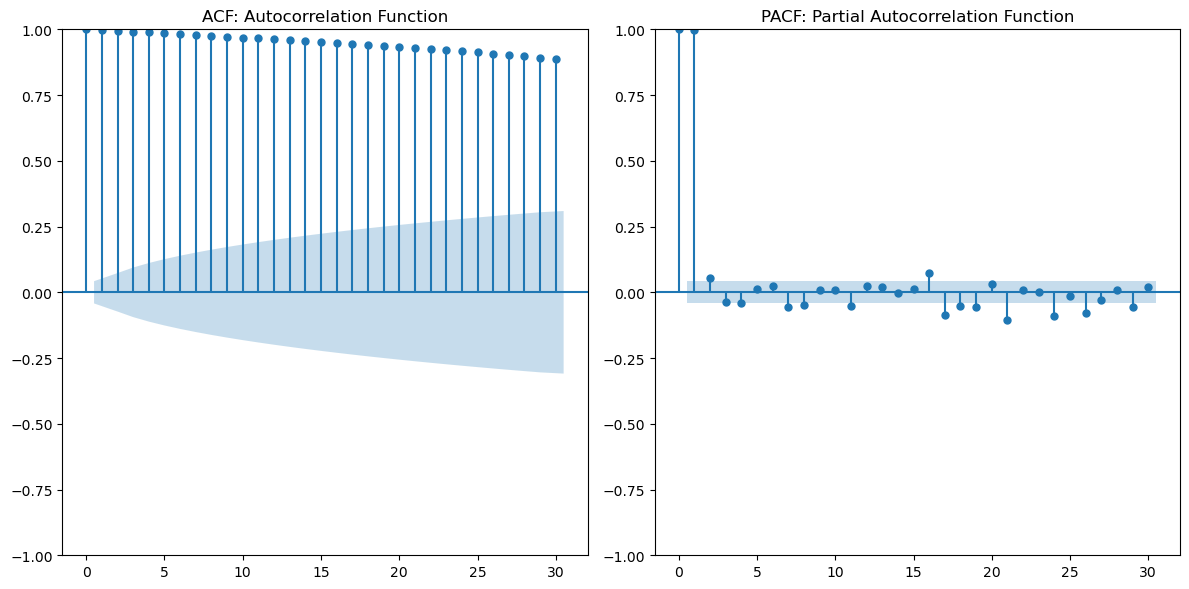

In [36]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF
plt.figure(figsize=(12, 6))

# ACF (autocorrelation)
plt.subplot(1, 2, 1)
plot_acf(df['price'], lags=30, ax=plt.gca())
plt.title('ACF: Autocorrelation Function')

# PACF (partial autocorrelation)
plt.subplot(1, 2, 2)
plot_pacf(df['price'], lags=30, ax=plt.gca())
plt.title('PACF: Partial Autocorrelation Function')

plt.tight_layout()
plt.show()

In [39]:
pip install prophet

     ---------------------------------------- 13.3/13.3 MB 7.0 MB/s eta 0:00:00
     ---------------------------------------- 1.1/1.1 MB 7.8 MB/s eta 0:00:00
     ---------------------------------------- 94.5/94.5 kB 5.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


10:27:22 - cmdstanpy - INFO - Chain [1] start processing
10:27:23 - cmdstanpy - INFO - Chain [1] done processing


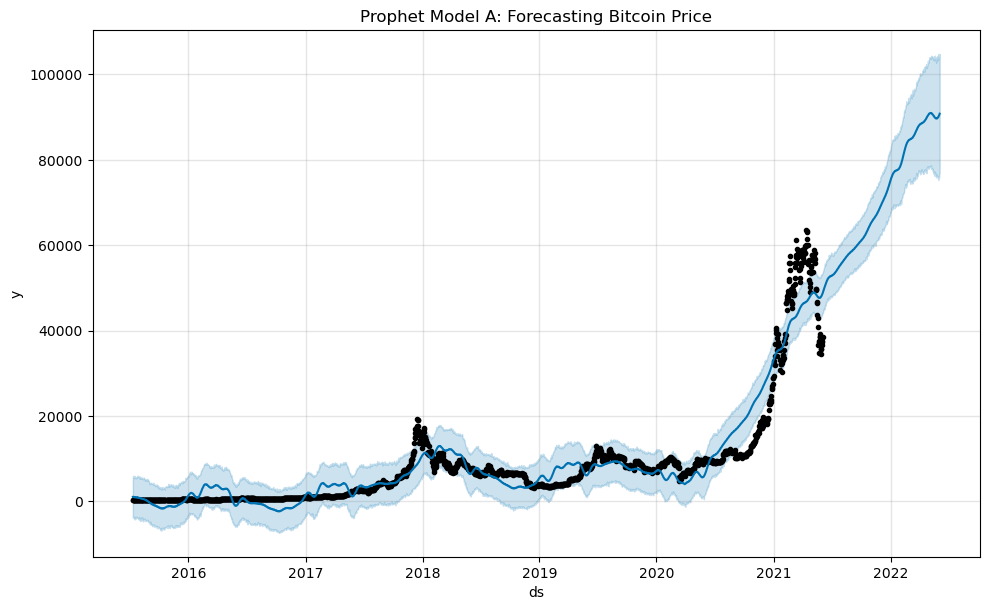

In [41]:
# Import Prophet
from prophet import Prophet

# Prepare data for Prophet
df_prophet = df[['date', 'price']].rename(columns={'date': 'ds', 'price': 'y'})

# Initialize and fit the Prophet model
model_A = Prophet()
model_A.fit(df_prophet)

# Forecast
future = model_A.make_future_dataframe(periods=365)  # Forecast for the next year
forecast_A = model_A.predict(future)

# Plot the forecast
model_A.plot(forecast_A)
plt.title('Prophet Model A: Forecasting Bitcoin Price')
plt.show()

In [42]:
# Prepare dataset with lag and moving averages
df_prophet_b = df[['date', 'price', 'SMA_10', 'SMA_50', 'EMA_10', 'EMA_50']].rename(columns={'date': 'ds', 'price': 'y'})

# Initialize and fit the Prophet model with additional features
model_B = Prophet()
model_B.add_regressor('SMA_10')
model_B.add_regressor('SMA_50')
model_B.add_regressor('EMA_10')
model_B.add_regressor('EMA_50')

model_B.fit(df_prophet_b)

# Forecast
future_b = model_B.make_future_dataframe(periods=365)
future_b['SMA_10'] = df['SMA_10'].shift(1)
future_b['SMA_50'] = df['SMA_50'].shift(1)
future_b['EMA_10'] = df['EMA_10'].shift(1)
future_b['EMA_50'] = df['EMA_50'].shift(1)

forecast_B = model_B.predict(future_b)

# Plot the forecast
model_B.plot(forecast_B)
plt.title('Prophet Model B: Forecasting with Moving Averages and Lag Variables')
plt.show()

KeyError: "['SMA_10', 'SMA_50', 'EMA_10', 'EMA_50'] not in index"

In [35]:
from sklearn.impute import KNNImputer

# KNN Imputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

TypeError: Cannot cast DatetimeArray to dtype float64